# Check and make figure for gait transition 
This plot is included as follows:
- phase diagrams with changing gate speed
- supplied energy during gait transition
- phase transition 

# Preparation

fix src/config.py as follows: 
```py
count = {
    "every_for_animation": 100,
    "every_for_csv_save": 25,
    "end_time_for_one_target_data": 2
}
```

run following code to measure data: (please just copy and paste on terminal)
``` sh
$ python3 simulate_and_make_data.py --mode low-to-high
``` 
and
``` sh
$ python3 simulate_and_make_data.py --mode high-to-low

```



## Import module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../'))
from src.config import *
from matplotlib.ticker import MaxNLocator

plt.rcParams['font.family'] = 'Times New Roman'
data_folder = str(os.getcwd())+"/../data"

## Set label

In [2]:
phase_mapping_actual = {
    "PHASE.JUMPING": 2,       
    "PHASE.SINGLE_SUPPORT": 1,  
    "PHASE.DOUBLE_SUPPORT": 0    
}

phase_mapping_virtual = {
    "PHASE.JUMPING": 4,          
    "PHASE.SUPPORT": 3
}

phase_mapping = {
    "PHASE.JUMPING": 2,          
    "PHASE.SINGLE_SUPPORT": 1,  
    "PHASE.DOUBLE_SUPPORT": 0,    
    "PHASE.JUMPING": 4,         
    "PHASE.SUPPORT": 3
}

rename_list_actual=['DS Phase', 'SS Phase', 'F Phase']

rename_list_virtual=['SS Phase', 'F Phase']


rename_list=['DS Phase', 'SS Phase', 'F Phase', r'SS$_{v}$ Phase',  r'F$_{v}$ Phase']

## Function definition
> multicolored_energy_scatter()
- set up for plot
- ax is needed for argument
> time_to_data_num()
- get time
> plot_phases()
- plot transition phase


In [3]:
def multicolored_energy_scatter(ax):
    ax.scatter(x, y, s=1, c="skyblue", alpha=0.5)
    plt.xlabel('Target Velocity (m/s)')
    plt.ylabel('Energy (J)')
    plt.xlim(x.min()-0., x.max()+0.)
    plt.ylim(0, 2.5e-10*10000*1000/0.0001)
    plt.grid()

def time_to_data_num(time):
    return int(time/params["dt"]/count["every_for_csv_save"])

def plot_phases(ax, data, phase_mapping_actual, phase_mapping_virtual, rename_list, start, end):
    time = data.iloc[0][start:end]
    y_phase_actual = [phase_mapping_actual.get(phase, -1) for phase in data.iloc[28][start:end]]
    y_phase_virtual = [phase_mapping_virtual.get(phase, -1) for phase in data.iloc[30][start:end]]
    ax.plot(time, y_phase_actual, label='Actual Phase', color='k')
    ax.plot(time, y_phase_virtual, label='Virtual Phase', color='gray')
    ax.set_yticks([0, 1, 2, 3, 4])
    ax.set_yticklabels(rename_list)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Phase')
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.grid()

## Plot com velocity with gait speed from low to high

101.0 102.0
201.0 202.0
281.0 282.0
321.0 322.0
401.0 402.0
481.0 482.0


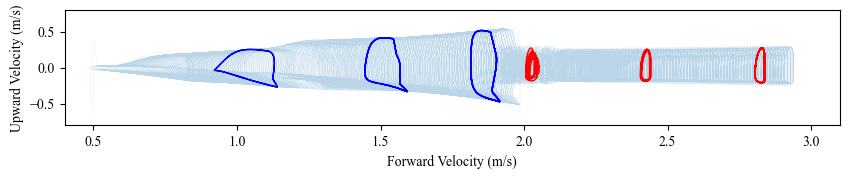

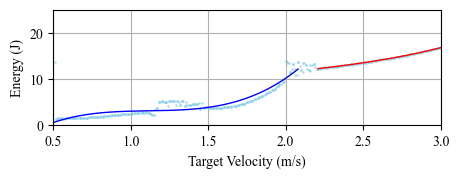

In [4]:
name = "gait_transition_low_to_high"
data = np.genfromtxt(str(data_folder)+"/gait_transition_from_low_to_high.csv", delimiter=",")
data = data.T
fig, ax = plt.subplots(figsize=(10,1.5))
x = data[1]; y = data[2]
ax.plot(x, y, '-', alpha = 0.3, linewidth = 0.1)

plt.xlabel('Forward Velocity (m/s)')
plt.ylabel('Upward Velocity (m/s)')
plt.xlim(0.4, 3.1)
plt.ylim(-0.8, 0.8)

plot_dx_list = [1.0,1.5,1.9]
for i in plot_dx_list:
    plot_dx = i
    start_time = ( plot_dx - target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) + 1.0
    end_time =   ( plot_dx -  target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) + 2.0
    ax.plot(data[1][time_to_data_num(start_time):time_to_data_num(end_time)], data[2][time_to_data_num(start_time):time_to_data_num(end_time)], '-', color="blue",alpha = 1, linewidth = 1)
    print(start_time, end_time)


plot_dx_list = [2.1,2.5,2.9]
for i in plot_dx_list:
    plot_dx = i
    start_time = ( plot_dx - target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) + 1.0
    end_time =   ( plot_dx -  target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) + 2.0
    ax.plot(data[1][time_to_data_num(start_time):time_to_data_num(end_time)], data[2][time_to_data_num(start_time):time_to_data_num(end_time)], '-', color="red",alpha = 1, linewidth = 1)
    print(start_time, end_time)
plt.show()

# ###
fig, ax = plt.subplots(figsize=(5,1.5))
skip = 500
x = data[3][100:-1:skip]
y = data[19][100:-1:skip]
walk_x = x[0:255]
walk_y = np.polyfit(walk_x, y[0:255], 3)
walk_y = np.poly1d(walk_y)(walk_x)
run_x = x[275:-1]
run_y = np.polyfit(run_x, y[275:-1], 3)
run_y = np.poly1d(run_y)(run_x)

ax.plot(walk_x, walk_y,
        '-', color="blue", alpha=1, linewidth=1)
ax.plot(run_x, run_y,
        '-', color="red", alpha=1, linewidth=1)
multicolored_energy_scatter(ax)
plt.show()


## Plot com velocity with gait speed from high to low

-38.99999999999999 -37.99999999999999
-99.0 -98.0
-139.0 -138.0
-319.0 -318.0
-399.0 -398.0
-479.0 -478.0


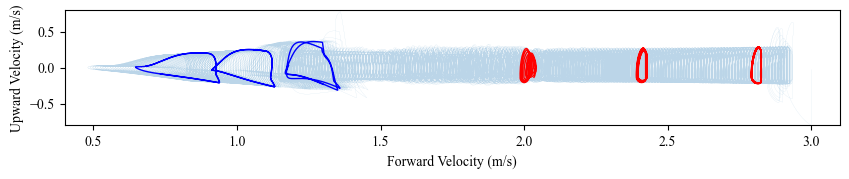

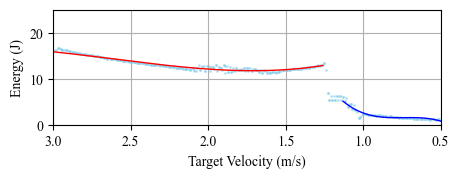

In [5]:
name = "gait_transition_high_to_low"
data = np.genfromtxt(str(data_folder)+"/gait_transition_from_high_to_low.csv", delimiter=",")
data = data.T

fig, ax = plt.subplots(figsize=(10,1.5))

x = data[1]; y = data[2]
ax.plot(x, y, '-', alpha = 0.3, linewidth = 0.1)

plt.xlabel('Forward Velocity (m/s)')
plt.ylabel('Upward Velocity (m/s)')
plt.xlim(0.4, 3.1)
plt.ylim(-0.8, 0.8)

plot_dx_list = [0.7,1.0,1.2]
for i in plot_dx_list:
    plot_dx = i
    start_time = -( plot_dx - target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) +1.0
    end_time =   -( plot_dx -  target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) + 2.0
    ax.plot(data[1][time_to_data_num(start_time):time_to_data_num(end_time)], data[2][time_to_data_num(start_time):time_to_data_num(end_time)], '-', color="blue",alpha = 1, linewidth = 1)
    print(start_time, end_time)

plot_dx_list = [2.1,2.5,2.9]
for i in plot_dx_list:
    plot_dx = i
    start_time = -( plot_dx - target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) + 1.0
    end_time =   -( plot_dx -  target_value["begin_dx"])*target_value["duration_time_for_one_target"]/(target_value["change_target_dx_every"]) + 2.0
    ax.plot(data[1][time_to_data_num(start_time):time_to_data_num(end_time)], data[2][time_to_data_num(start_time):time_to_data_num(end_time)], '-', color="red",alpha = 1, linewidth = 1)
    print(start_time, end_time)
plt.show()

###
fig, ax = plt.subplots(figsize=(5,1.5))
skip = 500
x = data[3][100:-1:skip]
y = data[19][100:-1:skip]
walk_x = x[300:-1]
walk_y = np.polyfit(walk_x, y[300:-1], 3)
walk_y = np.poly1d(walk_y)(walk_x)
run_x = x[0:280]
run_y = np.polyfit(run_x, y[0:280], 3)
run_y = np.poly1d(run_y)(run_x)
ax.plot(walk_x, walk_y,
        '-', color="blue", alpha=1, linewidth=1)
ax.plot(run_x, run_y,
        '-', color="red", alpha=1, linewidth=1)
multicolored_energy_scatter(ax)
plt.xlim(x.max()+0., x.min()-0.)
plt.show()

## Phase transition with gait speed from low to high

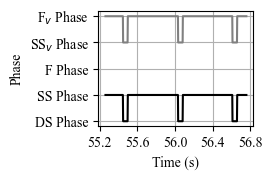

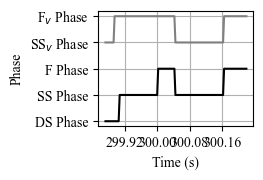

In [6]:
data = pd.read_csv(str(data_folder) + "/gait_transition_from_low_to_high.csv").T
start = 22102
end = start+600
fig, ax = plt.subplots(figsize=(2, 1.5))
plot_phases(ax, data, phase_mapping_actual, phase_mapping_virtual, rename_list, start, end)
plt.show()
# 
start = 119885+62
end = start+140
fig, ax = plt.subplots(figsize=(2, 1.5))
plot_phases(ax, data, phase_mapping_actual, phase_mapping_virtual, rename_list, start, end)
plt.show()

## Phase transition with gait speed from high to low

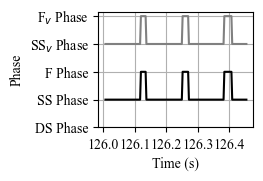

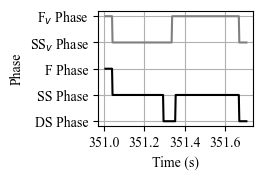

In [7]:
data = pd.read_csv(str(data_folder) + "/gait_transition_from_high_to_low.csv").T

start = 50401
end = start+180
fig, ax = plt.subplots(figsize=(2, 1.5))
plot_phases(ax, data, phase_mapping_actual, phase_mapping_virtual, rename_list, start, end)
plt.show()
##
start = 140401
end = start+280
fig, ax = plt.subplots(figsize=(2, 1.5))
plot_phases(ax, data, phase_mapping_actual, phase_mapping_virtual, rename_list, start, end)
plt.show()